# Рекуррентные нейронные сети

## Читаем данные

In [2]:
import numpy as np,tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

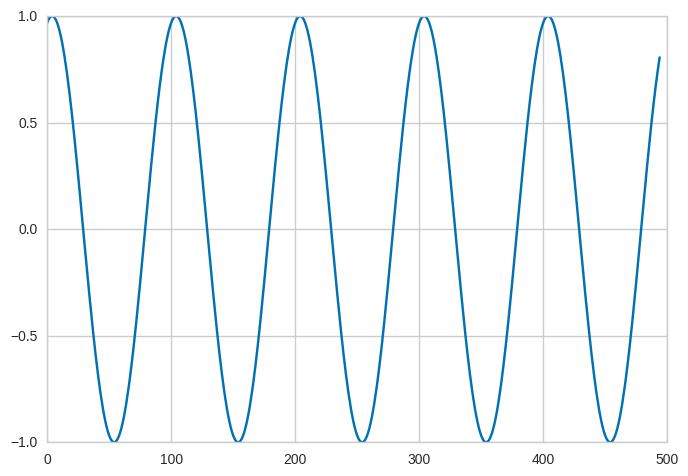

In [3]:
def load_data(filename, seq_len, normalise_window):
    data = [ float(x) for x in open(filename)]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

x_train, y_train, x_test, y_test = load_data('sinwave.csv', 50, False)
plt.plot(y_test)
plt.show()

In [6]:
x_train

array([[[ 0.93171798],
        [ 0.90707503],
        [ 0.87885226],
        ..., 
        [-0.98326833],
        [-0.96988996],
        [-0.95268387]],

       [[-0.05749049],
        [-0.12006371],
        [-0.1821631 ],
        ..., 
        [-0.13059922],
        [-0.06808878],
        [-0.00530962]],

       [[ 0.420969  ],
        [ 0.47709402],
        [ 0.53133618],
        ..., 
        [-0.24354357],
        [-0.30396289],
        [-0.3631826 ]],

       ..., 
       [[-0.98326833],
        [-0.96988996],
        [-0.95268387],
        ..., 
        [ 0.9999859 ],
        [ 0.99834605],
        [ 0.99276619]],

       [[ 0.59207254],
        [ 0.54030231],
        [ 0.48639974],
        ..., 
        [-0.73259304],
        [-0.68840801],
        [-0.64150614]],

       [[-0.84147098],
        [-0.8737364 ],
        [-0.90255357],
        ..., 
        [ 0.72532366],
        [ 0.7671179 ],
        [ 0.80588467]]])

## Строим модель

In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers, regularizers
tf.python.control_flow_ops = tf

Using TensorFlow backend.


In [8]:
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))

model.compile(loss="mse", optimizer="adam")

In [9]:
model.fit( x_train, y_train, batch_size=512, nb_epoch=10, validation_split=0.05)

Train on 4232 samples, validate on 223 samples
Epoch 1/10
4232/4232 [==============================] - 12s - loss: 0.1370 - val_loss: 0.0146
Epoch 2/10
4232/4232 [==============================] - 11s - loss: 0.0308 - val_loss: 0.0039
Epoch 3/10
4232/4232 [==============================] - 11s - loss: 0.0173 - val_loss: 0.0014
Epoch 4/10
4232/4232 [==============================] - 13s - loss: 0.0128 - val_loss: 0.0011
Epoch 5/10
4232/4232 [==============================] - 12s - loss: 0.0099 - val_loss: 2.6566e-04
Epoch 6/10
4232/4232 [==============================] - 11s - loss: 0.0083 - val_loss: 2.3006e-04
Epoch 7/10
4232/4232 [==============================] - 11s - loss: 0.0078 - val_loss: 1.2074e-04
Epoch 8/10
4232/4232 [==============================] - 11s - loss: 0.0071 - val_loss: 1.0575e-04
Epoch 9/10
4232/4232 [==============================] - 11s - loss: 0.0063 - val_loss: 8.8122e-05
Epoch 10/10
4232/4232 [==============================] - 12s - loss: 0.0062 - val_loss:

## Предсказываем

### Предсказываем только следующую точку

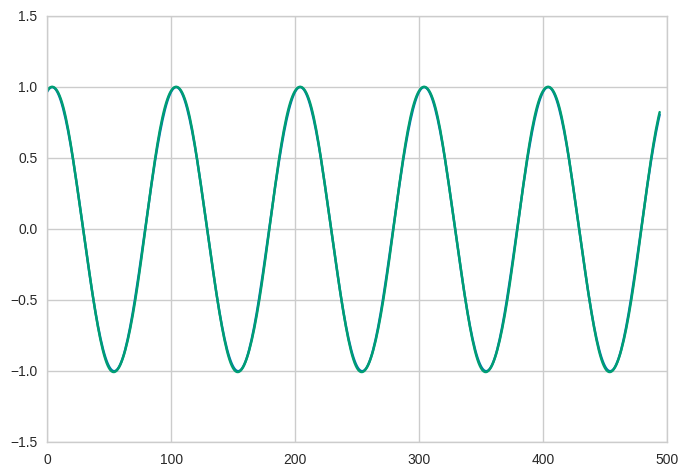

In [10]:
def predict_point_by_point(model, data):
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

predicted = predict_point_by_point(model, x_test)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

### Предсказываем надолго в будущее

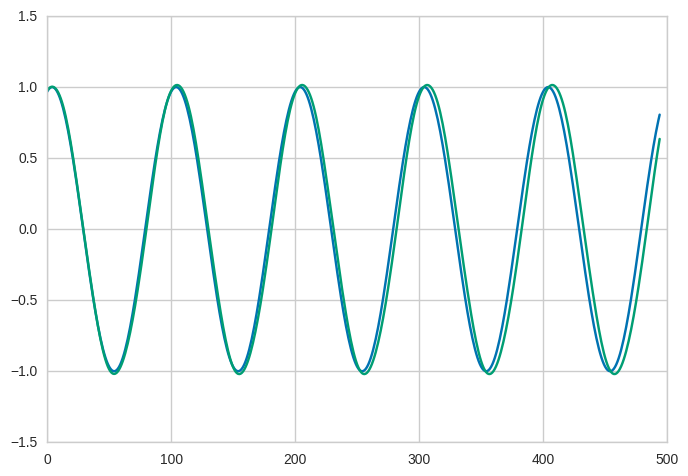

In [11]:
def predict_sequence_full(model, data, window_size):
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

predicted = predict_sequence_full(model, x_test, 50)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

# Попробуем что-то более сложное

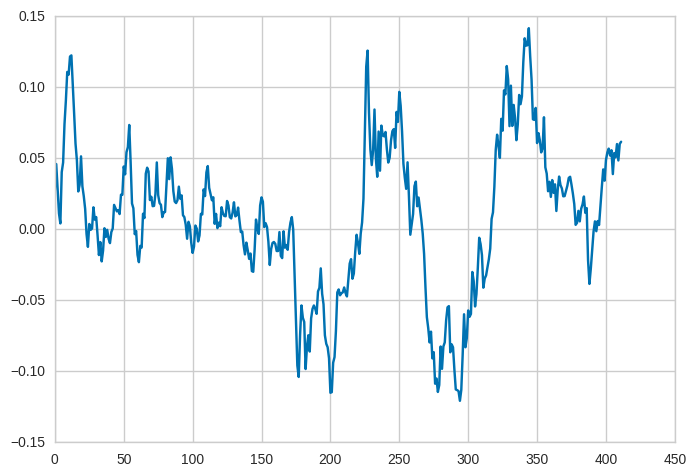

In [12]:
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

x_train, y_train, x_test, y_test = load_data('sp500.csv', 50, True)
plt.plot(y_test)
plt.show()

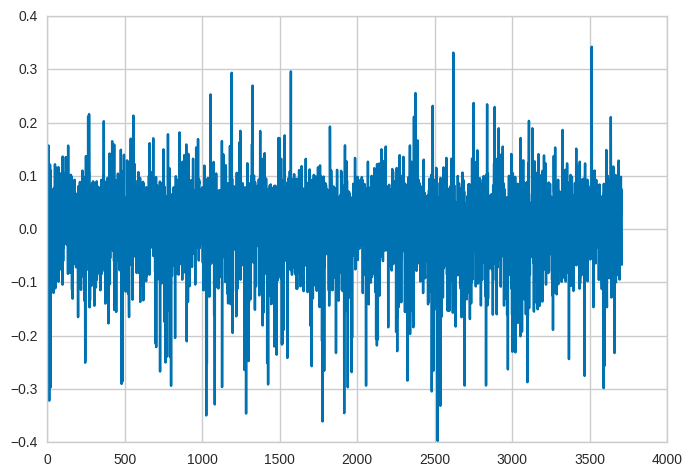

In [13]:
plt.plot(y_train)
plt.show()

In [15]:
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))
# TimeDistributedDense
model.compile(loss="mse", optimizer="adam")

In [16]:
model.fit( x_train, y_train, batch_size=512, nb_epoch=100, validation_split=0.05)

Train on 3522 samples, validate on 186 samples
Epoch 1/100
3522/3522 [==============================] - 11s - loss: 0.0034 - val_loss: 0.0011
Epoch 2/100
3522/3522 [==============================] - 9s - loss: 0.0013 - val_loss: 6.4975e-04
Epoch 3/100
3522/3522 [==============================] - 9s - loss: 7.7196e-04 - val_loss: 5.7366e-04
Epoch 4/100
3522/3522 [==============================] - 9s - loss: 6.7323e-04 - val_loss: 4.8135e-04
Epoch 5/100
3522/3522 [==============================] - 9s - loss: 5.9189e-04 - val_loss: 4.4743e-04
Epoch 6/100
3522/3522 [==============================] - 9s - loss: 5.7939e-04 - val_loss: 4.1341e-04
Epoch 7/100
3522/3522 [==============================] - 9s - loss: 5.4352e-04 - val_loss: 3.8907e-04
Epoch 8/100
3522/3522 [==============================] - 9s - loss: 5.0585e-04 - val_loss: 3.7051e-04
Epoch 9/100
3522/3522 [==============================] - 9s - loss: 4.9321e-04 - val_loss: 3.6000e-04
Epoch 10/100
3522/3522 [======================

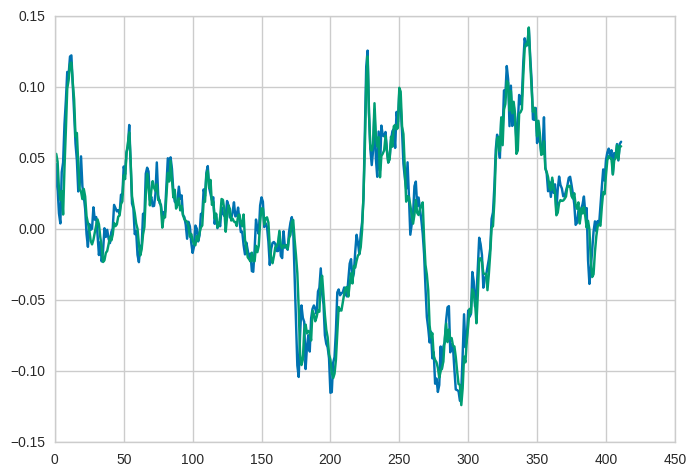

In [17]:
predicted = predict_point_by_point(model, x_test)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

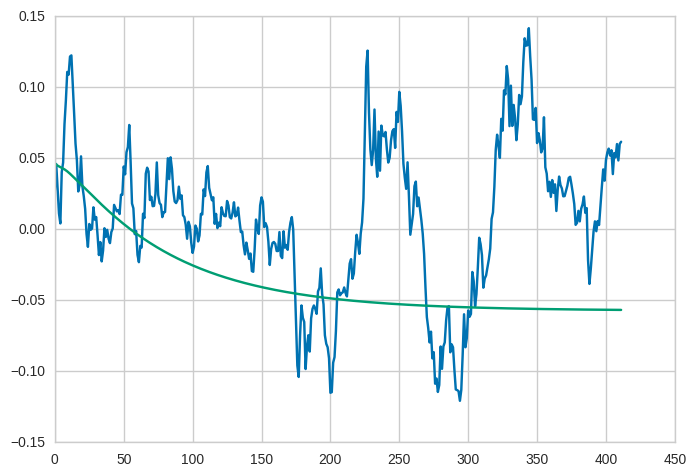

In [18]:
predicted = predict_sequence_full(model, x_test, 50)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

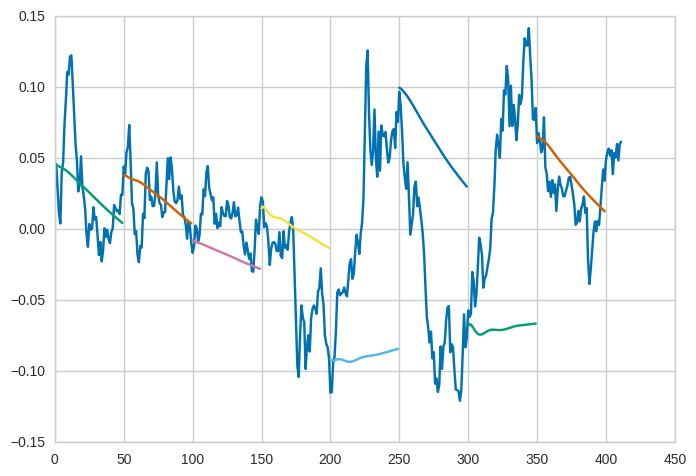

In [19]:
def predict_sequences_multiple(model, data, window_size, prediction_len):
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

predicted = predict_sequences_multiple(model, x_test, 50, 50)
plt.plot(y_test)
for i, data in enumerate(predicted):
    padding = [None for p in range(i * 50)]
    plt.plot(padding + data)
plt.show()